In [1]:
%matplotlib notebook


In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt


In [3]:
def getTissuePositions(inputNames, ouputNames, gridSize,dx,dy):
        
    #--------------------------------------------------
    # generate grids
    #--------------------------------------------------
    grid = []
    for x in range(-gridSize, gridSize+1):
      for y in range(-gridSize, gridSize+1):
        if x % 2 == 0:
            grid.append((x*200, y*200))
        else:
            grid.append((x*200, -y*200))

    grid_R =  grid[::-1]
    grid = np.array(grid)
    grid_R = np.array(grid_R)
    
    positions = np.empty((0,2))

    for i in range(len(inputNames)):
        
        # read input positions
        points = pd.read_csv(inputNames[i], header = None, sep=',')
        print(inputNames[i]+ ' read!')
        print(str(points.shape[0]) + ' points found.')
        
        n = points.shape[0] #number of positions you selected for each slice to define the region of interest
        
        tissue = geometry.Polygon(points.values)
        center = np.mean(points.values, axis = 0)
        grids = grid + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))
        
    # add displacement between 10x and 60x objectives
    positions = positions + [dX,dY]
        
    #---------------------------------------------------
    # save data
    #---------------------------------------------------
    if len(outputNames) > 1:
        for i in range(len(outputNames)):
            np.savetxt(outputNames[i], positions, delimiter=',')
            print(outputNames[i]+ ' saved!')
    elif len(outputNames) == 1:
        np.savetxt(outputNames[0], positions, delimiter=',')
        print(outputNames[0]+ ' saved!')
        
    print(str(positions.shape[0]) + ' positions generated.\n')
    
    
    return positions
    

### Shared variables

In [4]:
gridSize = 50
expDate = '220824'
expName = 'BC203'
imagingSettingsFolder = f'c:/Software/imaging-settings/{expDate}_{expName}/'
positionsFolder = f'C:/Software/merfish-parameters/positions/'

# Displacement of 60X objective respect to 10X for MF3

In [5]:
dX=-259.6
dY=18.4

### sample21d

In [13]:
sample = '21d'

# create grid for each section
inputNames = [f'{imagingSettingsFolder}sample_{sample}/boundary_positions_{sample}_1.txt',
              
              f'{imagingSettingsFolder}sample_{sample}/boundary_positions_{sample}_3.txt']
outputNames = [f'{imagingSettingsFolder}sample_{sample}/positions_{expName}_sample_{sample}.txt', 
               f'{positionsFolder}/positions_{expName}_sample_{sample}.txt']
positions = getTissuePositions(inputNames,outputNames,gridSize,dX,dY)

c:/Software/imaging-settings/220824_BC203/sample_21d/boundary_positions_21d_1.txt read!
18 points found.
c:/Software/imaging-settings/220824_BC203/sample_21d/boundary_positions_21d_3.txt read!
13 points found.
c:/Software/imaging-settings/220824_BC203/sample_21d/positions_BC203_sample_21d.txt saved!
C:/Software/merfish-parameters/positions//positions_BC203_sample_21d.txt saved!
2471 positions generated.



<IPython.core.display.Javascript object>


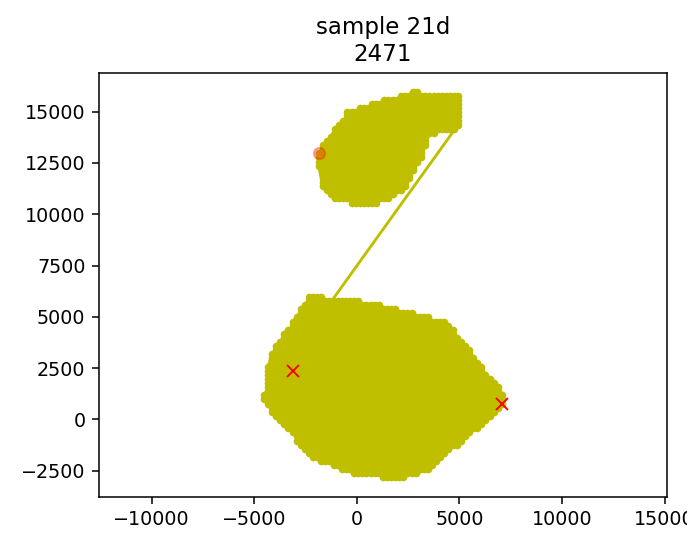

In [14]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))    
        
# load positions file
positions = pd.read_csv(outputNames[0], header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'y.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro', alpha=0.3)
ax.plot(positions.X.iloc[747],positions.Y.iloc[747],'rx')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')

ax.set_title(f'sample {sample}\n{positions.shape[0]}')
ax.axis('equal')
#ax.axis([-2000,10000,-10000,11000])
    
# ax.axis('off')
fig.tight_layout()    

 ### sampled10
    

In [15]:
sample = '10d'

# create grid for each section
inputNames = [f'{imagingSettingsFolder}sample_{sample}/boundary_positions_{sample}_1.txt',
              f'{imagingSettingsFolder}sample_{sample}/boundary_positions_{sample}_2.txt',
              f'{imagingSettingsFolder}sample_{sample}/boundary_positions_{sample}_3.txt']
outputNames = [f'{imagingSettingsFolder}sample_{sample}/positions_{expName}_sample_{sample}.txt', 
               f'{positionsFolder}/positions_{expName}_sample_{sample}.txt']
positions = getTissuePositions(inputNames,outputNames,gridSize,dX,dY)

c:/Software/imaging-settings/220824_BC203/sample_10d/boundary_positions_10d_1.txt read!
17 points found.
c:/Software/imaging-settings/220824_BC203/sample_10d/boundary_positions_10d_2.txt read!
29 points found.
c:/Software/imaging-settings/220824_BC203/sample_10d/boundary_positions_10d_3.txt read!
37 points found.
c:/Software/imaging-settings/220824_BC203/sample_10d/positions_BC203_sample_10d.txt saved!
C:/Software/merfish-parameters/positions//positions_BC203_sample_10d.txt saved!
1120 positions generated.



<IPython.core.display.Javascript object>


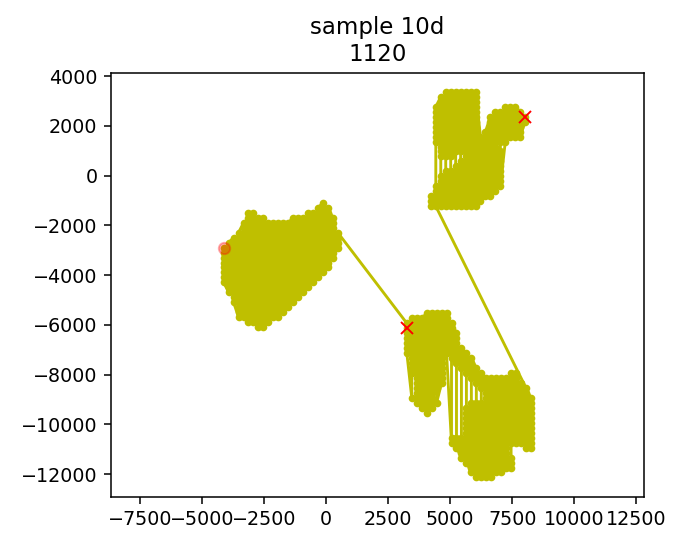

In [19]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))    
        
# load positions file
positions = pd.read_csv(outputNames[0], header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'y.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro', alpha=0.3)
ax.plot(positions.X.iloc[400],positions.Y.iloc[400],'rx')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')

ax.set_title(f'sample {sample}\n{positions.shape[0]}')
ax.axis('equal')
#ax.axis([-2000,10000,-10000,11000])
    
# ax.axis('off')
fig.tight_layout()    